# Hw 2
### Joshua Karten


In [1829]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import scipy.integrate as spi

## Intro
We are interested in numerically estimating $K_n = \int_0^1 \frac{x^n}{z +\alpha x}$

 This will be done through upward and downwards recurrence, checking the answer with numerical integration in scipy 

In [1830]:
import math
def Upwards(z, alpha, n):
    "returns array of j_i from i=0 to i=l, including l"
    res = np.zeros(n+1)
    if abs(z)<1e-30: # first take care of the special case, which is numerically hard.
        res[0]=1.
        return res
    k0 =math.log((1+alpha/z))/alpha
    res[0]=k0
    if n==0: return res    
    for i in range(1,n+1):
        kn = 1/(alpha*(i)) - (z/alpha)*k0  
        res[i]=kn        
        k0= kn          
    return res

In [1831]:
def Downwards( z,alpha,n,):
    if abs(alpha/z)>1:   # diverges quickly in this case, prevents overflow
        res = np.zeros(n+1)
        res[0]=1
        return res
    nstart = n-1 # we directly calculate knmax and downward recurr so nstart = nmax-1
    kn=0
    ratio = alpha/z
    for k in range(0,100000): #can be changed to be lower without significant decrease.
        kn+=((-ratio)**k)/(n+k+1)
    kn = kn/z
    res = [kn] # [j_l,j_{l-1},.....j_0]
    for i in range(nstart,-1,-1):
        k0 = 1/(z*(i+1)) - (alpha/z)*kn  
        if i<=n : res.append(k0)
        kn=k0 # sets the calculated value to the next used downward recursion value
    res.reverse()      # reverse the list: [k0,k1,....k_n]
    res = np.array(res) 
    return res

def Downwards2( z,alpha,n,):
    
    if abs(alpha/z)>1:   
        res = np.zeros(n+1)
        res[0]=1
        return res
    nstart = 1000*n-1 #+1+ 100*n # reasonable accuracy gains max out around this amount
    kn=0
    ratio = alpha/z
    kn = kn/z
    res = [] # [j_l,j_{l-1},.....j_0]
    for i in range(nstart,-1,-1):
        k0 = 1/(z*(i+1)) - (alpha/z)*kn  
        if i<=n : res.append(k0)
        kn=k0 # sets the calculated value to the next used downward recursion value
    res.reverse()      # reverse the list: [j0,j1,....j_l]
    res = np.array(res) 
    return res

In [1832]:
def Rec2(alpha,z,n): 
    # taylor expansion as in the bottom on the class notebook
    #agrees with scipy integration to a close enough extent but inferior overall
    res = np.zeros(n+1, dtype=float)
    for i in range(n+1):
        kn=0
        for k in range(1):
            kn=kn+(1/z)*((-alpha/z)**k)/(i+k+1)
        res[i]+=kn
    return res

In [1833]:
def Combined(alpha, z, n): #Makes the choice of upward or downward recursion
    if (alpha/z)<1/2:
        ans = Downwards(z,alpha,n)
    else:
        ans = Upwards(z,alpha, n)
    return ans

## Scipy Integration
To verify our answers, we will integrate Kn using scipy. This will give more accurate answers over all $\alpha$ and z than a taylor series expansion

In [1834]:
def integrand(x,n,z,alpha):
    return x**n/(z+alpha*x) #integrand of kn


def K_n(n,z, alpha):
    result,error = spi.quad(integrand,0,1,args=(n,z,alpha))
    return result

In [1835]:
z=2
n=10
alpha=1
dint = np.array([K_n(n,z,1) for n in range(11)])
dup = Upwards(z,alpha,n)
um=np.array(Rec2(alpha,z,n))
dnd =Downwards(z,alpha,n)
dnd2= Downwards2(z,alpha,n)
dff = abs(dint-dnd)
df = dff/dint
print("%4s %16s %16s %16s %16s" % ('n','exact','upward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.10f %16.10f %16.10f %16.8g" % (i,dint[i],dup[i],abs(dint-dup)[i], (abs(dint-dup)/dint)[i]))

   l            exact           upward        abs-error        rel-error
   0     0.4054651081     0.4054651081     0.0000000000                0
   1     0.1890697838     0.1890697838     0.0000000000                0
   2     0.1218604324     0.1218604324     0.0000000000                0
   3     0.0896124685     0.0896124685     0.0000000000     6.194579e-16
   4     0.0707750631     0.0707750631     0.0000000000    1.1764981e-15
   5     0.0584498739     0.0584498739     0.0000000000    2.7304517e-15
   6     0.0497669189     0.0497669189     0.0000000000    5.8559692e-15
   7     0.0433233050     0.0433233050     0.0000000000    1.4254719e-14
   8     0.0383533900     0.0383533900     0.0000000000    3.1841914e-14
   9     0.0344043312     0.0344043312     0.0000000000    7.0993697e-14
  10     0.0311913377     0.0311913377     0.0000000000    1.5694709e-13


In [1836]:
np.shape(dnd)

(11,)

In [1837]:
print("%4s %16s %16s %16s %16s" % ('n','exact','downward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dint[i],dnd[i],abs(dint-dnd)[i], (abs(dint-dnd)/dint)[i]))

   l            exact         downward        abs-error        rel-error
   0  0.4054651081082  0.4054651081082  0.0000000000000                0
   1  0.1890697837837  0.1890697837837  0.0000000000000                0
   2  0.1218604324327  0.1218604324327  0.0000000000000    2.2776528e-16
   3  0.0896124684680  0.0896124684680  0.0000000000000    1.5486447e-16
   4  0.0707750630640  0.0707750630640  0.0000000000000                0
   5  0.0584498738721  0.0584498738721  0.0000000000000    1.1871529e-16
   6  0.0497669189225  0.0497669189225  0.0000000000000    2.7885568e-16
   7  0.0433233050121  0.0433233050121  0.0000000000000    1.6016539e-16
   8  0.0383533899758  0.0383533899758  0.0000000000000                0
   9  0.0344043311595  0.0344043311595  0.0000000000000                0
  10  0.0311913376810  0.0311913376810  0.0000000000000    3.3369331e-16


In [1838]:
print("%4s %16s %16s %16s %16s" % ('n','exact','downward2','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dint[i],dnd2[i],abs(dint-dnd2)[i], (abs(dint-dnd2)/dint)[i]))

   l            exact        downward2        abs-error        rel-error
   0  0.4054651081082  0.4054651081082  0.0000000000000                0
   1  0.1890697837837  0.1890697837837  0.0000000000000                0
   2  0.1218604324327  0.1218604324327  0.0000000000000    2.2776528e-16
   3  0.0896124684680  0.0896124684680  0.0000000000000    1.5486447e-16
   4  0.0707750630640  0.0707750630640  0.0000000000000                0
   5  0.0584498738721  0.0584498738721  0.0000000000000    1.1871529e-16
   6  0.0497669189225  0.0497669189225  0.0000000000000    2.7885568e-16
   7  0.0433233050121  0.0433233050121  0.0000000000000    1.6016539e-16
   8  0.0383533899758  0.0383533899758  0.0000000000000                0
   9  0.0344043311595  0.0344043311595  0.0000000000000                0
  10  0.0311913376810  0.0311913376810  0.0000000000000     1.112311e-16


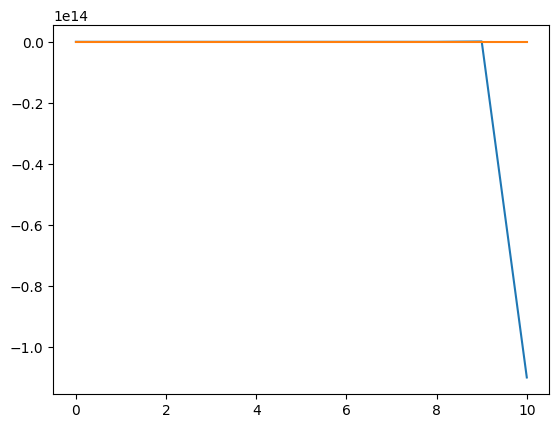

In [1839]:
#Instability of upwards
alpha =1 
z = 1000
n=10
dup = Upwards(z,alpha,n)
fig,ax = plt.subplots()
ax.plot(np.linspace(0,10,11),dup[:])
ax.plot(np.linspace(0,10,11), dint[:])
plt.show()


In [1840]:
alp= [0.1,0.4,0.49,0.51,0.6,0.9,1,10,100]
z=0.1
n=10
#date = np.array([Rec2(t,z,n) for t in alp])
datc = np.array([Combined(t,z,n) for t in alp])
dat1 = np.array([Downwards(z,t,n)  for t in alp])
diff1 = date-dat1
diff= abs(date-datc)


In [1841]:
dats = np.zeros((np.size(alp),n+1))
for i in range(np.size(alp)):
    dats[i,:]= np.array([K_n(n,z,alp[i]) for n in range(11)])

In [1842]:
alps = np.geomspace(0.01,100,10)
cdat2 = np.zeros((len(alps),len(alps),11))
sdat2 = np.zeros((len(alps),len(alps),11))

for i in range(len(alps)):
    for j in range(len(alps)):
        cdat2[i,j,:]=np.array(Combined(alps[i],alps[j],10))
        sdat2[i,j,:] = np.array([K_n(n,alps[j],alps[i]) for n in range(11)])
        


In [1843]:
sdat2=np.log(sdat2)
cdat2=np.log(cdat2)
diff2 = np.abs(sdat2-cdat2)

In [1844]:
diff2 = np.abs(sdat2-cdat2)

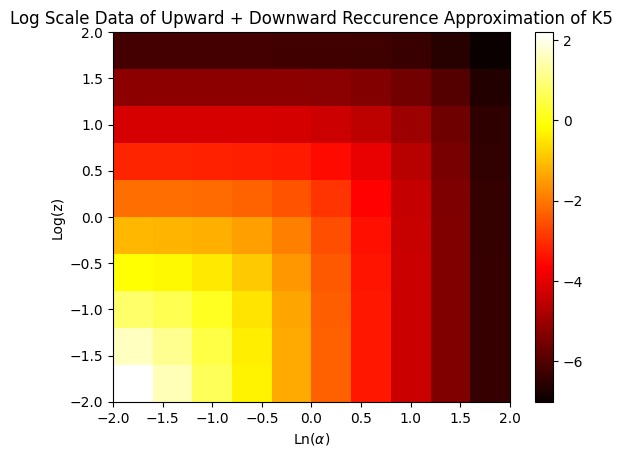

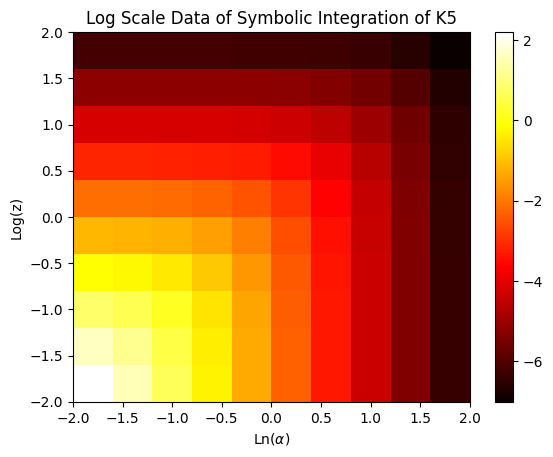

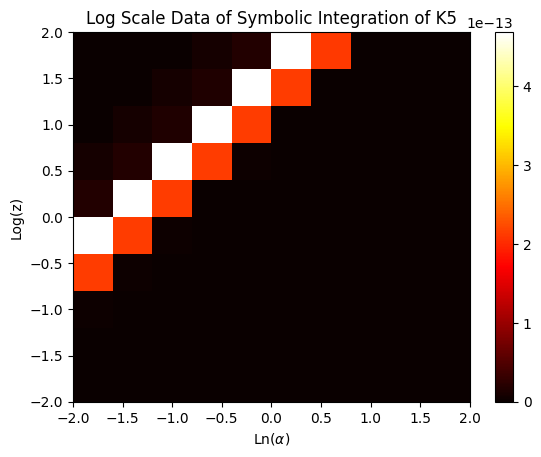

In [1845]:
it = 5
fig,ax=plt.subplots()
rec1=plt.imshow(cdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(cdat2[:,:,it]), vmax=np.max(cdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Upward + Downward Reccurence Approximation of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Ln($\alpha$)')
fig,ax=plt.subplots()
rec1=plt.imshow(sdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(sdat2[:,:,it]), vmax=np.max(sdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Symbolic Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Ln($\alpha$)')
plt.show()
fig,ax=plt.subplots()
rec1=plt.imshow(diff2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(diff2[:,:,it]), vmax=np.max(diff2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Symbolic Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Ln($\alpha$)')
plt.show()

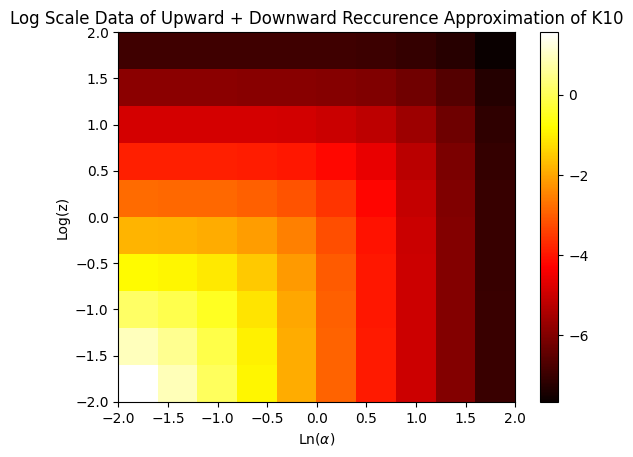

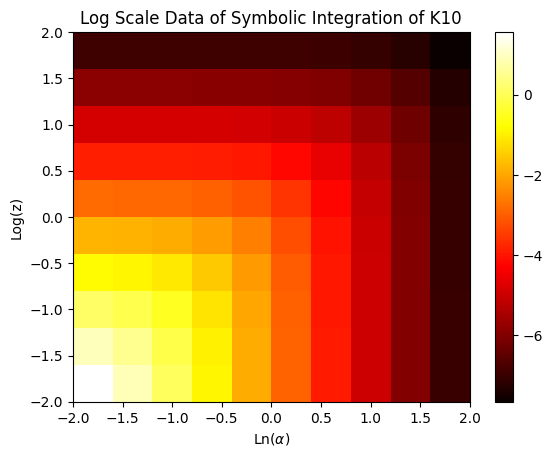

In [1846]:
it = 10
fig,ax=plt.subplots()
rec1=plt.imshow(cdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(cdat2[:,:,it]), vmax=np.max(cdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Upward + Downward Reccurence Approximation of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Ln($\alpha$)')
fig,ax=plt.subplots()
rec1=plt.imshow(sdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(sdat2[:,:,it]), vmax=np.max(sdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Symbolic Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Ln($\alpha$)')
plt.show()

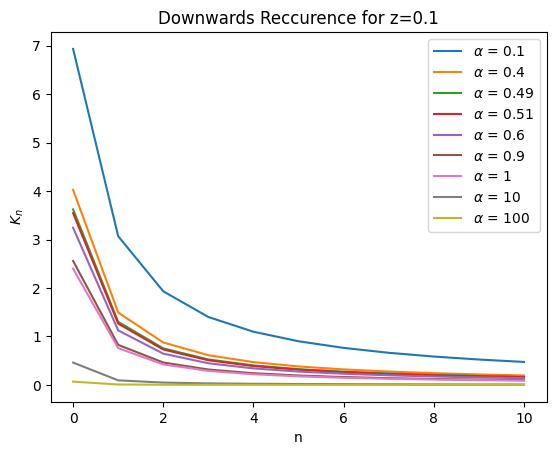

Text(0, 0.5, '$K_n$')

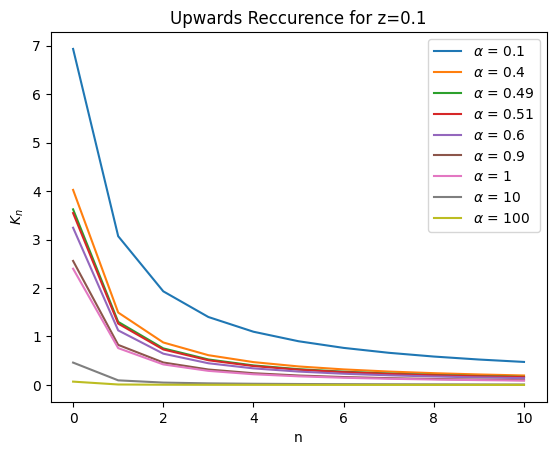

In [1847]:
fig,ax=plt.subplots()
for i in range(np.size(alp)):
    ax.plot(np.linspace(0,10,11),datc[i, :], label=r"$\alpha$ = " + str(alp[i]))
ax.legend()
ax.set_title('Downwards Reccurence for z='+str(z))
ax.set_xlabel('n')
ax.set_ylabel(r'$K_n$')
plt.show()

fig,ax=plt.subplots()
for i in range(np.size(alp)):
    ax.plot(np.linspace(0,10,11),dats[i, :], label=r"$\alpha$ = " + str(alp[i]))
ax.legend()
ax.set_title('Upwards Reccurence for z='+str(z))
ax.set_xlabel('n')
ax.set_ylabel(r'$K_n$')